
#### Market Basket Analysis.
***Finding the top 10 itemsets and the top 10 rules based on Lift.***<br>



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#loading data
data = pd.read_excel('D:/masters/DATASCIENCE/Dataset/groceries.xlsx', header = None) 
data.shape

(9835, 32)

In [3]:
data.head() #viewing and understanding the data  

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe() 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,waffles,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


***Data Preprocessing***

In [5]:
data.fillna(0,inplace=True) #replacing NULL/NaN value by 0 for further Preprocessing 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Data Visulaztion***

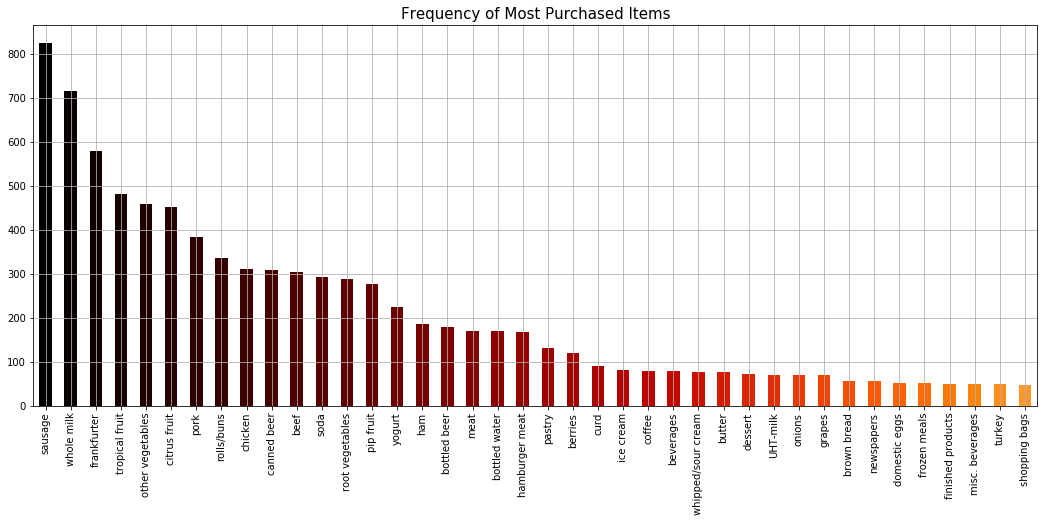

In [6]:
#looking at the frequency of most popular items 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gist_heat(np.linspace(0, 1, 50))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of Most Purchased Items', fontsize = 15)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [7]:
basket = []
for i in range(0, len(data)):
    basket.append([str(data.values[i,j]) for j in range(0, 32) if str(data.values[i,j])!='0'])

basket = np.array(basket)

In [8]:
basket

array([list(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']),
       list(['tropical fruit', 'yogurt', 'coffee']), list(['whole milk']),
       ...,
       list(['chicken', 'citrus fruit', 'other vegetables', 'butter', 'yogurt', 'frozen dessert', 'domestic eggs', 'rolls/buns', 'rum', 'cling film/bags']),
       list(['semi-finished bread', 'bottled water', 'soda', 'bottled beer']),
       list(['chicken', 'tropical fruit', 'other vegetables', 'vinegar', 'shopping bags'])],
      dtype=object)

***Apriori Algorithm*** 

In [9]:
#Using TransactionEncoder to convert the data in OneHot 
te = TransactionEncoder()
data = te.fit_transform(basket)
df = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
df.shape
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#using 3.8% as support threshold to find items and itemsets
frequent_itemsets = apriori(df, min_support=0.038, use_colnames=True) 
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) #creating a column for the no.of itemset lenght
frequent_itemsets.tail() 

,support,itemsets,length
39,0.056634,"(rolls/buns, whole milk)",2
40,0.048907,"(root vegetables, whole milk)",2
41,0.040061,"(soda, whole milk)",2
42,0.042298,"(tropical fruit, whole milk)",2
43,0.056024,"(yogurt, whole milk)",2


In [11]:
top10_itemset= frequent_itemsets[(frequent_itemsets['length'] >= 2)] #condition to find only the itemsets & exclude the items
top10_itemset.sort_values(by=['support'], ascending =False).head(10) #printing the top 10 itemsets based on Support value

,support,itemsets,length
36,0.074835,"(other vegetables, whole milk)",2
39,0.056634,"(rolls/buns, whole milk)",2
43,0.056024,"(yogurt, whole milk)",2
40,0.048907,"(root vegetables, whole milk)",2
35,0.047382,"(other vegetables, root vegetables)",2
37,0.043416,"(other vegetables, yogurt)",2
34,0.042603,"(rolls/buns, other vegetables)",2
42,0.042298,"(tropical fruit, whole milk)",2
41,0.040061,"(soda, whole milk)",2
38,0.038332,"(rolls/buns, soda)",2


***above displayed are the top 10 itemsets we have found in the dataset using the Apriori Alogirthm using 9% support threshold which is sorted on the biases of support***

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5) #creating the rules using lift metric 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
3,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
4,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
5,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
7,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
8,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
9,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631


In [13]:
rules.sort_values(by=["lift"], ascending = False).head(10) #printing the top 10 rules based on lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
5,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
8,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
9,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
10,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
11,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


***above displayed are the top 10 rules we have found in the dataset using the LIFT as a meteric for association rule***

* *Lift = 1; implies no relationship between X and Y (i.e., X and Y occur together only by chance)*
* *Lift > 1; implies that there is a positive relationship between X and Y (i.e., X and Y occur together more often than random)*
* *Lift < 1; implies that there is a negative relationship between X and Y (i.e., X and Y occur together less often than random)*

***Using the above conditions*** <br>
we can conclude the association betweeen the below items being bought together more often and it has a positive relation to eachother<br>
* (other vegetables,root vegetables)
* (whole milk,root vegetables)
* (yogurt,other vegetables)
* (whole milk,tropical fruit)
* (yogurt,whole milk)

*also by comparing lift, leverage and conviction we can state that there is more chance of **(other vegetables,root vegetables)** to be bought more often than all other items.* 